In [2]:
import utils.glucose as gl
import utils.prep as p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glucose = pd.read_csv('data-fasting/glucose.csv')

In [3]:
glucose.nunique()

Device                                  1
Serial Number                           1
Device Timestamp                     7248
Record Type                             4
Historic Glucose mmol/L                82
Scan Glucose mmol/L                    77
Non-numeric Rapid-Acting Insulin        0
Rapid-Acting Insulin (units)            0
Non-numeric Food                        1
Carbohydrates (grams)                   1
Carbohydrates (servings)                0
Non-numeric Long-Acting Insulin         0
Long-Acting Insulin Value (units)       0
Notes                                  16
Strip Glucose mmol/L                    0
Ketone mmol/L                           0
Meal Insulin (units)                    0
Correction Insulin (units)              0
User Change Insulin (units)             0
dtype: int64

In [4]:
dtime_lbl='dtime'
g_lbl = 'Historic Glucose mmol/L'
glucose['dtime']=pd.to_datetime(glucose['Device Timestamp'], format='%d-%m-%Y %H:%M')

In [5]:
glucose.set_index(dtime_lbl, inplace=True)

In [6]:
g_period = glucose['2020-03-15':'2020-05-30']

(array([737540., 737544., 737546., 737550., 737554., 737558., 737562.,
        737566., 737570., 737574., 737577.]),
 <a list of 11 Text major ticklabel objects>)

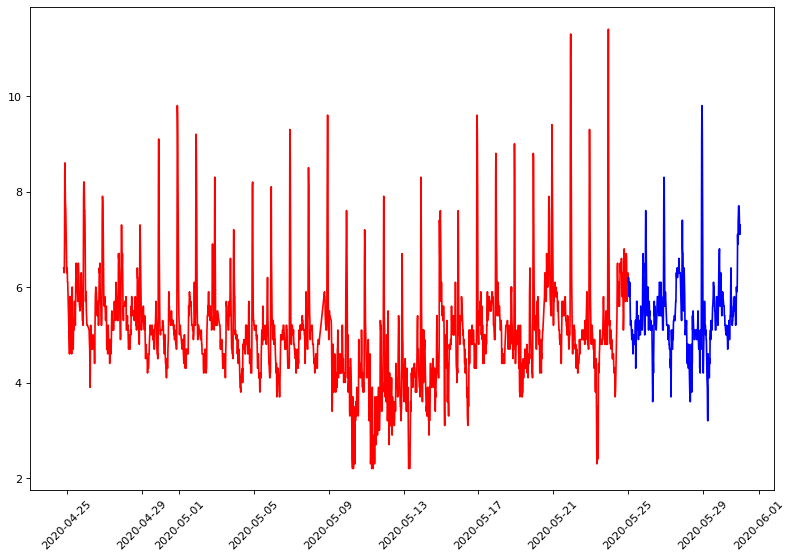

In [105]:
resize()
plt.plot(g_period['2020-04-24':'2020-05-24'][g_lbl], color='red')
plt.plot(g_period['2020-05-25':][g_lbl], color='blue')

plt.xticks(rotation=45)

# Get sleep data

In [3]:
sleep = pd.read_csv('data-fasting/sleep.csv')
readiness = pd.read_csv('data-fasting/readiness.csv')

In [6]:
readiness['.nunique()']

Unnamed: 0                71
period_id                  2
score                     20
score_activity_balance     3
score_hrv_balance         20
score_previous_day         2
score_previous_night      24
score_recovery_index      29
score_resting_hr          23
score_sleep_balance       24
score_temperature         15
summary_date              71
dtype: int64

In [5]:
readiness.nunique()

summdate_lbl = 'summary_date'

In [11]:
sleep[dtime_lbl] = pd.to_datetime(sleep[summdate_lbl], format='%Y-%m-%d')
readiness[dtime_lbl] = pd.to_datetime(readiness[summdate_lbl], format='%Y-%m-%d')

In [12]:
sleep.set_index(dtime_lbl, inplace=True)
readiness.set_index(dtime_lbl, inplace=True)

In [13]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total'],
      dtype='object')

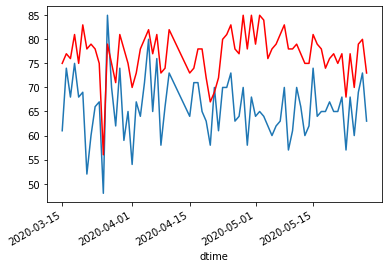

In [14]:
sleep['score'].plot()
readiness['score'].plot(color='red')

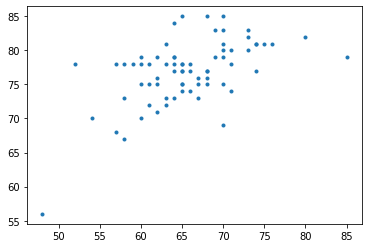

In [22]:
plt.plot(sleep.score, readiness.score, linestyle='none', marker='.')
s_score = np.array(sleep.score)
r_score = np.array(readiness.score)

0.550654852261264

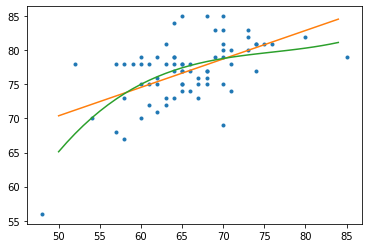

In [23]:
x = np.arange(50,85)

slope, intercept = np.polyfit(s_score, r_score, deg=1)
plt.plot(s_score, r_score, linestyle='none', marker='.')
y = slope*x + intercept
plt.plot(x, y)
a, b, c,d = np.polyfit(s_score, r_score, deg=3)
y2 = a*x*x*x + b*x*x + c*x + d
plt.plot(x, y2)
np.corrcoef(s_score, r_score)[0,1]

0.5506548522612632

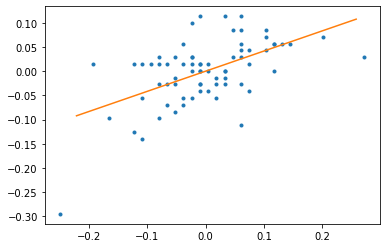

In [24]:
x = (np.arange(50,85)-np.mean(s_score))/len(s_score)

s_score = (s_score-np.mean(s_score))/len(s_score)
r_score = (r_score-np.mean(r_score))/len(r_score)
slope, intercept = np.polyfit(s_score, r_score, deg=1)
plt.plot(s_score, r_score, linestyle='none', marker='.')
y = slope*x + intercept
plt.plot(x, y)
a, b, c,d = np.polyfit(s_score, r_score, deg=3)
y2 = a*x*x*x + b*x*x + c*x + d
#plt.plot(x, y2)
np.corrcoef(s_score, r_score)[0,1]

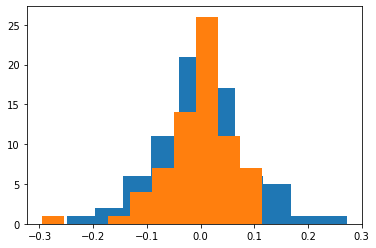

In [25]:
plt.hist(s_score, bins=10)
plt.hist(r_score, bins=10)
plt.show()

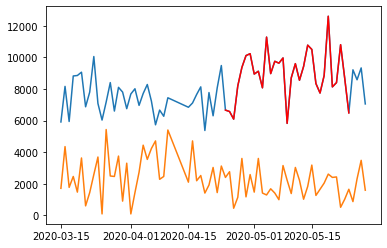

In [26]:
plt.plot(sleep['deep'])
plt.plot(sleep['2020-04-24':'2020-05-24']['deep'], color='red')
plt.plot(sleep['rem'])

No handles with labels found to put in legend.


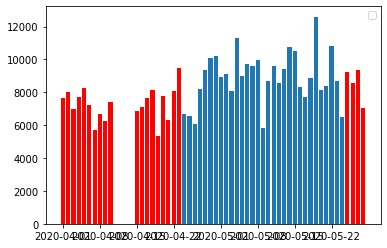

In [27]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['deep'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['deep'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['deep'], color='red')

plt.legend()

No handles with labels found to put in legend.


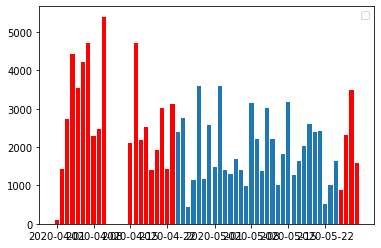

In [28]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['rem'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['rem'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['rem'], color='red')

plt.legend()

No handles with labels found to put in legend.


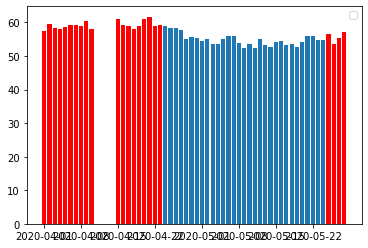

In [29]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['hr_average'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['hr_average'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['hr_average'], color='red')

plt.legend()

No handles with labels found to put in legend.


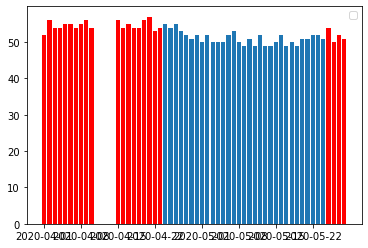

In [30]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['hr_lowest'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['hr_lowest'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['hr_lowest'], color='red')

plt.legend()

No handles with labels found to put in legend.


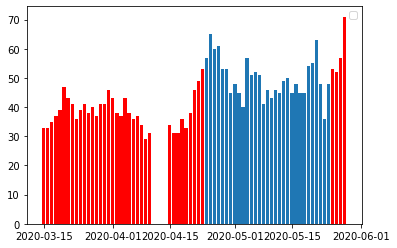

In [32]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['rmssd'])
plt.bar(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23']['rmssd'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['rmssd'], color='red')

plt.legend()

In [33]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total'],
      dtype='object')

No handles with labels found to put in legend.


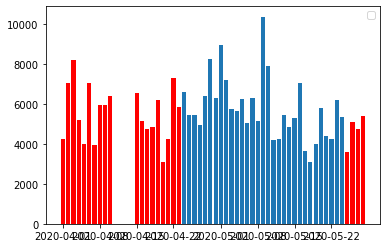

In [34]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['awake'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['awake'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['awake'], color='red')

plt.legend()

No handles with labels found to put in legend.


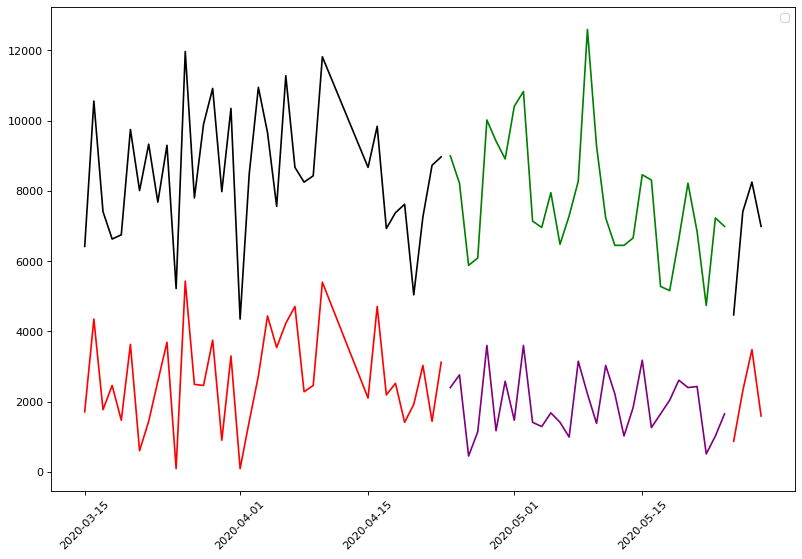

In [51]:
compar1='rem'
compar2='awake'
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1]+sleep['2020-04-24':'2020-05-24'][compar2], color='green')
plt.plot(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1]+sleep['2020-03-01':'2020-04-23'][compar2], color='black')
plt.plot(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1]+sleep['2020-05-25':][compar2], color='black')
plt.plot(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1], color='purple')
plt.plot(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1], color='red')
plt.plot(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1], color='red')
plt.xticks(rotation=45)


plt.legend()

No handles with labels found to put in legend.


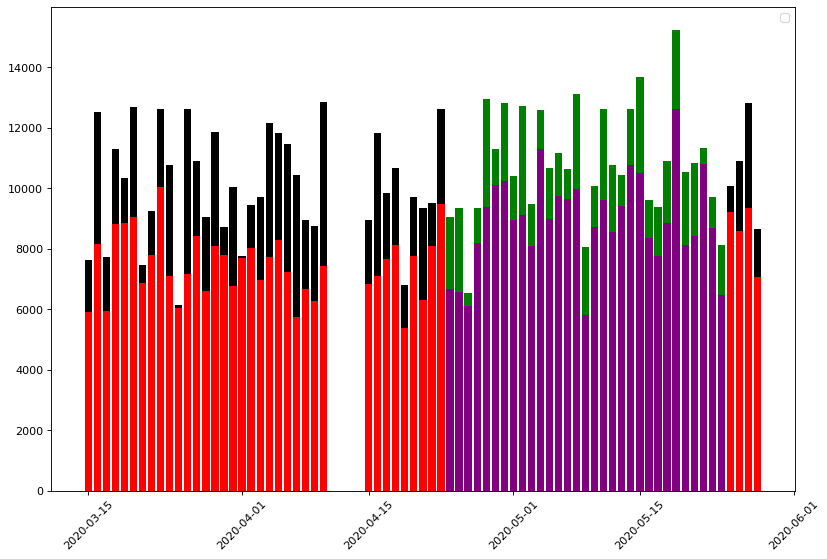

In [52]:
compar1='deep'
compar2='rem'
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1]+sleep['2020-04-24':'2020-05-24'][compar2], color='green')
plt.bar(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1]+sleep['2020-03-01':'2020-04-23'][compar2], color='black')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1]+sleep['2020-05-25':][compar2], color='black')
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1], color='purple')
plt.bar(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1], color='red')
plt.xticks(rotation=45)


plt.legend()

No handles with labels found to put in legend.


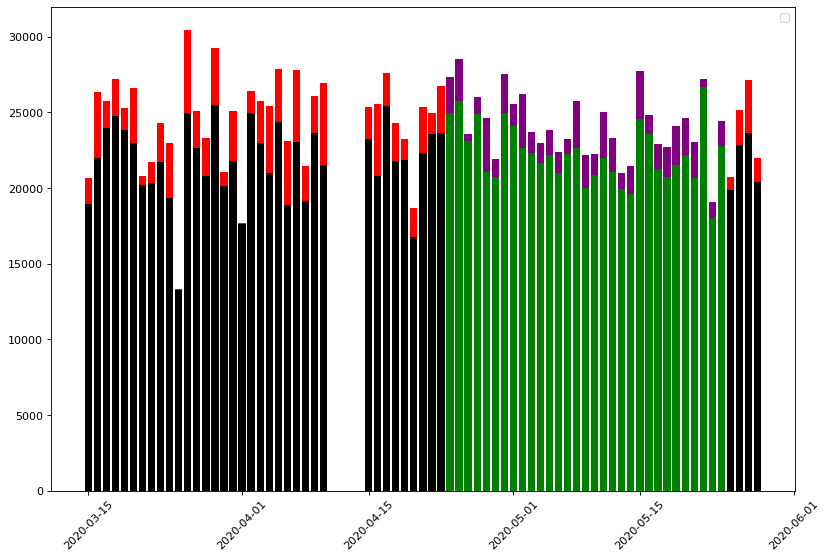

In [54]:
compar1='total'
compar2='rem'
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1], color='purple')
plt.bar(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1], color='red')
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1]-sleep['2020-04-24':'2020-05-24'][compar2], color='green')
plt.bar(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1]-sleep['2020-03-01':'2020-04-23'][compar2], color='black')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1]-sleep['2020-05-25':][compar2], color='black')
plt.xticks(rotation=45)


plt.legend()

No handles with labels found to put in legend.


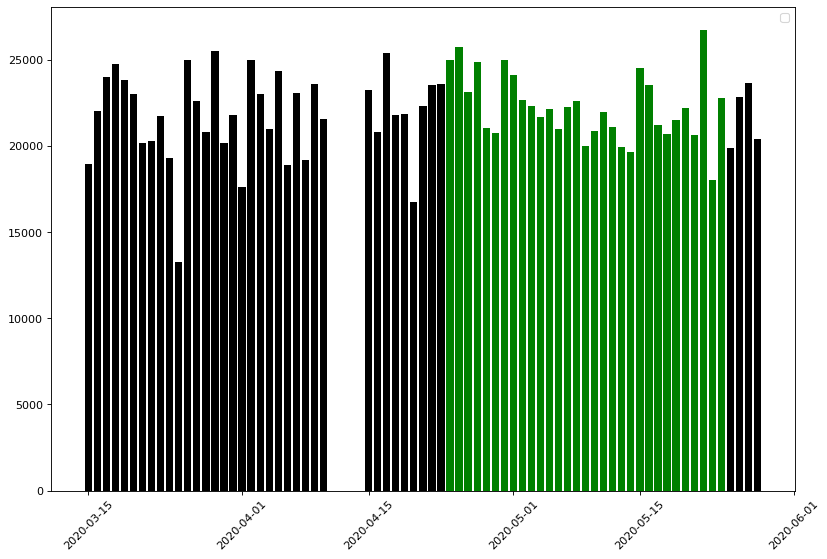

In [55]:
compar1='total'
compar2='rem'
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24'][compar1]-sleep['2020-04-24':'2020-05-24'][compar2], color='green')
plt.bar(sleep['2020-03-01':'2020-04-23'].index, sleep['2020-03-01':'2020-04-23'][compar1]-sleep['2020-03-01':'2020-04-23'][compar2], color='black')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':][compar1]-sleep['2020-05-25':][compar2], color='black')
plt.xticks(rotation=45)


plt.legend()

In [82]:
def resize():
    plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

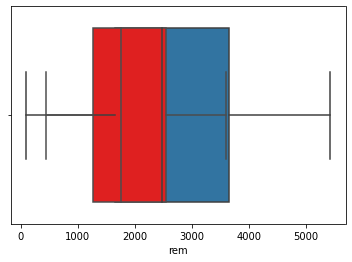

In [63]:
sns.boxplot(sleep['2020-03-01':'2020-04-23']['rem'])
sns.boxplot(sleep['2020-04-24':'2020-05-23']['rem'],color='red')
sleep['after fast']= sleep.index > '2020-04-24'

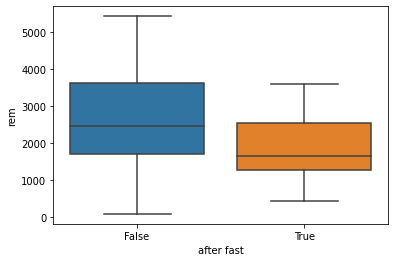

In [68]:
sns.boxplot(sleep['after fast'], sleep['rem'])

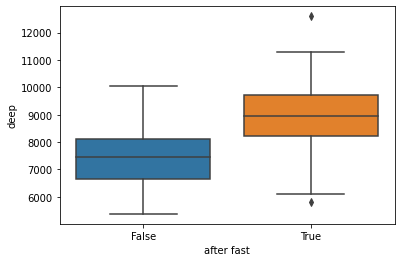

In [67]:
sns.boxplot(sleep['after fast'], sleep['deep'])

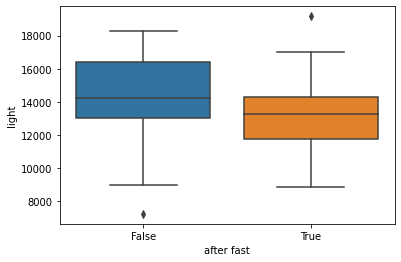

In [69]:
sns.boxplot(sleep['after fast'], sleep['light'])

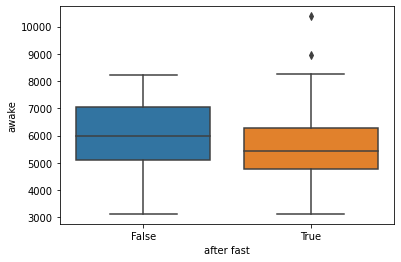

In [71]:
sns.boxplot(sleep['after fast'], sleep['awake'])

In [75]:

def get_empirical_cdf(data):
    """Returns the x,y values for a cumulative distribution function using an empirical method

    :param data: data as a numpy array
    :return: x,y
    """
    n = len(data)
    return np.sort(data), (np.arange(1, n+1) / n)
fasted_rem

array([[36, 6600, '2020-04-25T10:49:10+02:00', ..., 120, 27360, False],
       [37, 5460, '2020-04-26T12:18:00+02:00', ..., 120, 28500, True],
       [38, 5430, '2020-04-27T09:19:00+02:00', ..., 120, 23550, True],
       ...,
       [64, 4230, '2020-05-23T11:32:01+02:00', ..., 120, 27210, True],
       [65, 6210, '2020-05-24T08:49:01+02:00', ..., 120, 19050, True],
       [66, 5340, '2020-05-25T09:43:24+02:00', ..., 120, 24420, True]],
      dtype=object)

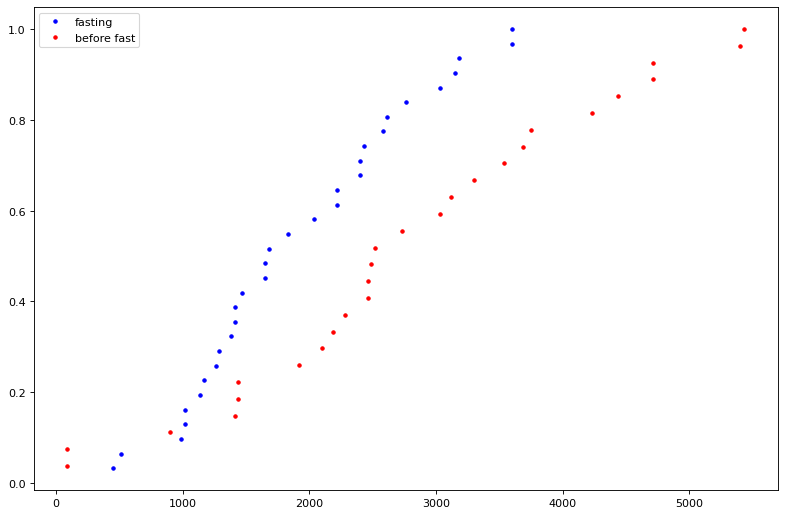

In [85]:
resize()
fasted_rem = np.array(sleep['2020-04-24':'2020-05-24']['rem'])
x, y = get_empirical_cdf(fasted_rem)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
pre_fasted_rem = np.array(sleep['2020-03-24':'2020-04-23']['rem'])
x, y = get_empirical_cdf(pre_fasted_rem)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fast')
plt.legend()

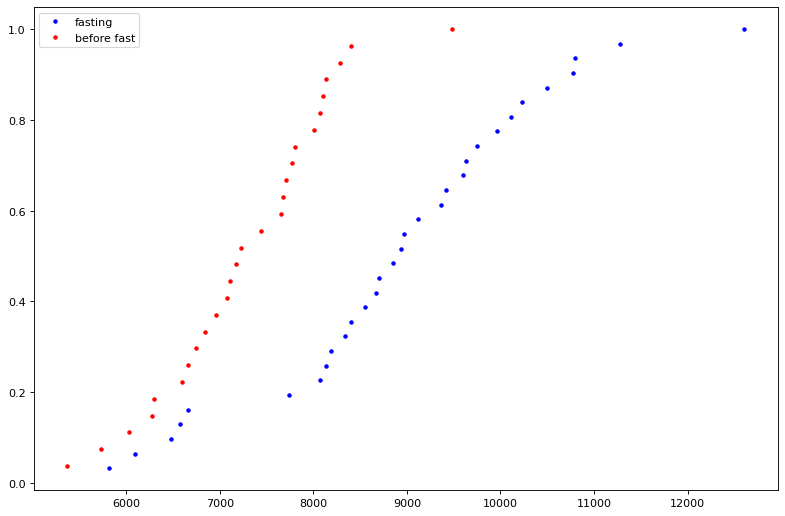

In [99]:
resize()
fasted_deep = np.array(sleep['2020-04-24':'2020-05-24']['deep'])
x, y =res get_empirical_cdf(fasted_deep)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
pre_fasted_deep = np.array(sleep['2020-03-24':'2020-04-23']['deep'])
x, y = get_empirical_cdf(pre_fasted_deep)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fast')
plt.legend()

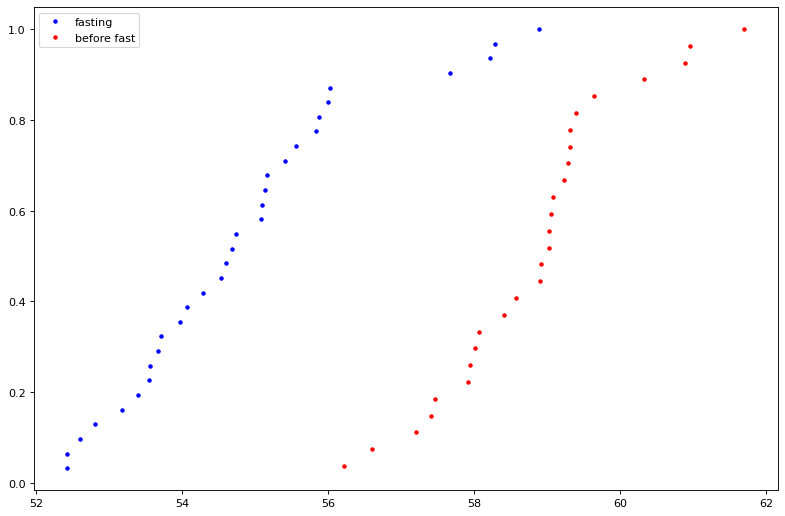

In [100]:
resize()
fasted_deep = np.array(sleep['2020-04-24':'2020-05-24']['hr_average'])
x, y = get_empirical_cdf(fasted_deep)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
pre_fasted_deep = np.array(sleep['2020-03-24':'2020-04-23']['hr_average'])
x, y = get_empirical_cdf(pre_fasted_deep)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fast')
plt.legend()

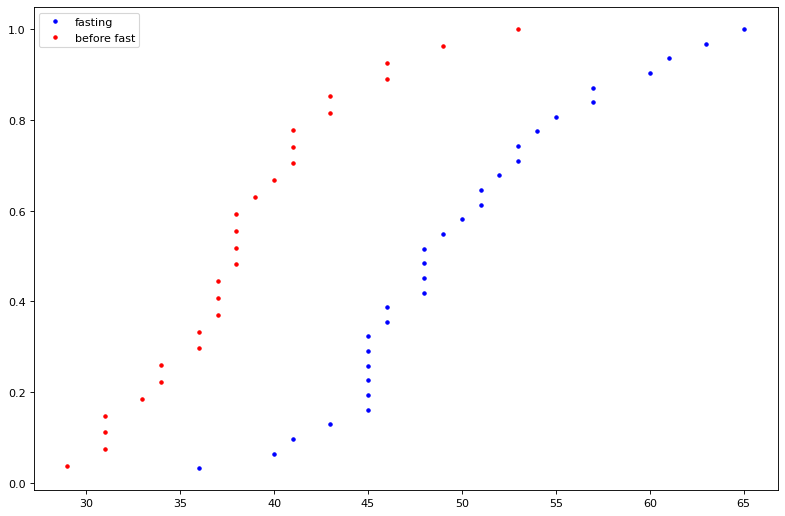

In [103]:
resize()
fasted_deep = np.array(sleep['2020-04-24':'2020-05-24']['rmssd'])
x, y = get_empirical_cdf(fasted_deep)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
pre_fasted_deep = np.array(sleep['2020-03-24':'2020-04-23']['rmssd'])
x, y = get_empirical_cdf(pre_fasted_deep)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fast')
plt.legend()

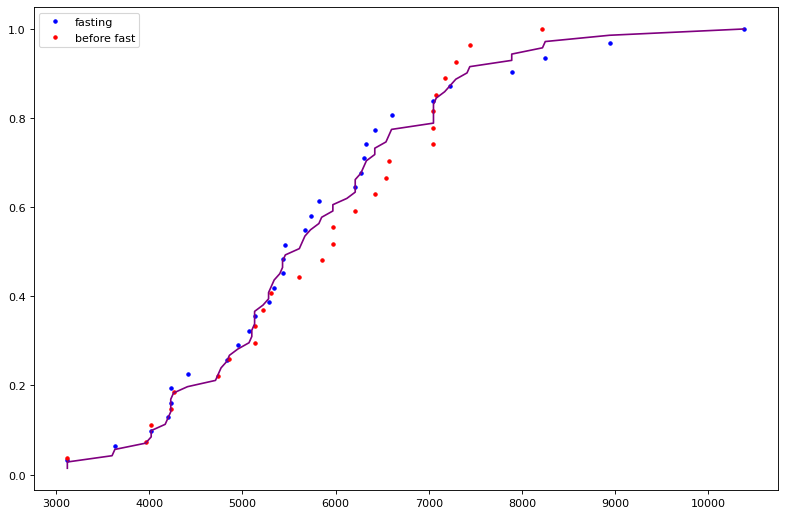

In [96]:
resize()
fasted_deep = np.array(sleep['2020-04-24':'2020-05-24']['awake'])
x, y = get_empirical_cdf(fasted_deep)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
pre_fasted_deep = np.array(sleep['2020-03-24':'2020-04-23']['awake'])
x, y = get_empirical_cdf(pre_fasted_deep)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fast')
all_deep = np.array(sleep['awake'])
x, y = get_empirical_cdf(all_deep)
plt.plot(x, y, color='purple')
plt.legend()

# Comparing REM/Deep sleep/HRV/RHR

## Formulation
We will use: 
* _amount of deep sleep_ : to refer to the period of deep sleep measured by the Oura ring. This is provided in the _deep_ column of the `sleep.csv` file. The unit used here is `seconds`

The _amount of deep sleep_ is increased during fasting.

**Null hypothesis**
The amount of deep sleep is not changed during the fast


In [244]:
test_lbl='deep'
fasted = np.array(sleep['2020-04-24':'2020-05-23'][test_lbl])
prefasted = np.array(sleep['2020-03-21':'2020-04-23'][test_lbl])
end = np.array(sleep['2020-05-25':][test_lbl])

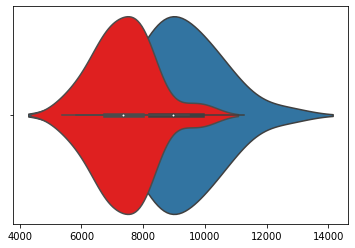

In [245]:
sns.violinplot(fasted)
sns.violinplot(prefasted,color='red')

In [246]:
fmean, pmean, fstd, pstd= np.mean(fasted), np.mean(prefasted), np.std(fasted), np.std(prefasted)
mean_diff = (pmean - fmean)/pmean
print("""
Mean diff \t{:.2%}:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s

Standard deviations:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s
""".format(mean_diff, fmean, pmean, fstd, pstd)
)
nf, npref= len(fasted), len(prefasted)
print("Lenghts: {}, {}".format(nf, npref))

fasted_n = (fasted -fmean)/nf
prefasted_n = (prefasted -pmean)/npref


Mean diff 	-21.90%:
- Fast  :	8,994.0 s
- Before:	7,378.0 s

Standard deviations:
- Fast  :	1,496.0 s
- Before:	993.1 s

Lenghts: 30, 30


In [247]:
print(mean_diff)
print(mean_diff_replicates)


-0.2190295473027921
[ 0.01506024  0.14291465  0.00562041 ... -0.07980162 -0.13762743
 -0.22635135]


In [248]:

def get_bootstrap_replicates_uni(data, func):
    bts_sample = np.random.choice(data, len(data))
    return func(bts_sample)


def draw_bootstrap_replicates(data, func, size=1):
    bts_replicates = np.empty(size)
    for i in range(size):
        bts_replicates[i] = get_bootstrap_replicates_uni(data, func)
    return bts_replicates


def get_permuted(data1, data2):
    permuted_data = np.random.permutation(np.concatenate((data1, data2)))
    return permuted_data[:len(data1)], permuted_data[len(data1):]


def permute_and_draw_replicates(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = get_permuted(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates


def get_means_diff(data_1, data_2):
    fm=np.mean(data_1)
    return ( fm- np.mean(data_2))/fm


In [249]:
mean_diff_replicates = permute_and_draw_replicates(prefasted, fasted, get_means_diff, size=100000)

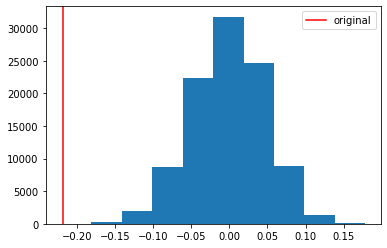

In [250]:
plt.hist(mean_diff_replicates)
plt.axvline(x=mean_diff, color='red', label='original')
plt.legend()

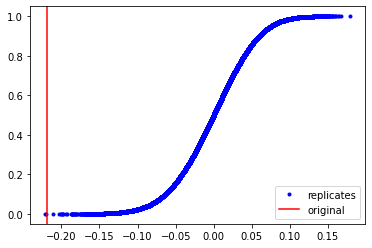

In [251]:
x, y = get_empirical_cdf(mean_diff_replicates)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=mean_diff, color='red', label='original')
plt.legend()

In [252]:
ps = np.percentile(mean_diff_replicates, [2.5, 97.5])
p_val = np.sum(mean_diff_replicates < mean_diff) / len(mean_diff_replicates)
print("""
Confidence Interval:
{:.4%}\t-\t{:.4%}
original value: {:.4%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], mean_diff, p_val, p_val))


Confidence Interval:
-9.8167%	-	8.8723%
original value: -21.9030%

P-value: 2e-05 (0%)



## REM sleep


Mean diff 	30.53%:
- Fast  :	1,913.8 s
- Before:	2,754.8 s

Standard deviations:
- Fast  :	872.3 s
- Before:	1,395.1 s

Lenghts: 29, 29


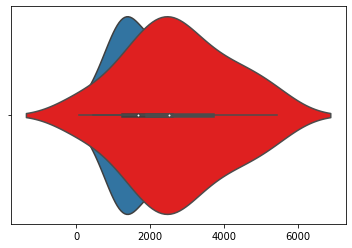

In [506]:
def mean_modiff(d1,d2):
    md1=np.mean(d1)
    if md1==0:
        return
    return (md1-np.mean(d2))/md1

test_lbl='rem'
fasted = np.array(sleep['2020-04-24':'2020-05-23'][test_lbl][1:])
prefasted = np.array(sleep['2020-03-21':'2020-04-23'][test_lbl][1:])
end = np.array(sleep['2020-05-25':][test_lbl])
sns.violinplot(fasted)
sns.violinplot(prefasted,color='red')
fmean, pmean, fstd, pstd= np.mean(fasted), np.mean(prefasted), np.std(fasted), np.std(prefasted)
mean_diff = (pmean - fmean)/pmean
print("""
Mean diff \t{:.2%}:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s

Standard deviations:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s
""".format(mean_diff, fmean, pmean, fstd, pstd)
)
nf, npref= len(fasted), len(prefasted)
print("Lenghts: {}, {}".format(nf, npref))

fasted_n = (fasted -fmean)/nf
prefasted_n = (prefasted -pmean)/npref

mean_diff_replicates = permute_and_draw_replicates(prefasted, fasted, get_means_diff, size=10000)


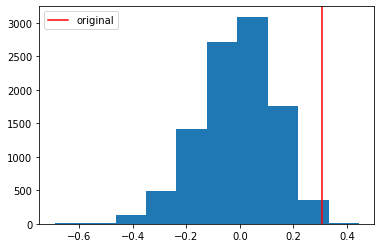

In [507]:
plt.hist(mean_diff_replicates)
plt.axvline(x=mean_diff, color='red', label='original')
plt.legend()

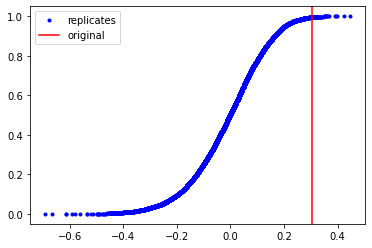

In [508]:
x, y = get_empirical_cdf(mean_diff_replicates)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=mean_diff, color='red', label='original')
plt.legend()

In [509]:

ps = np.percentile(mean_diff_replicates, [2.5, 97.5])
p_val = np.sum(mean_diff_replicates > mean_diff) / len(mean_diff_replicates)
print("""
Confidence Interval:
{:.4%}\t-\t{:.4%}
original value: {:.4%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], mean_diff, p_val, p_val))


Confidence Interval:
-31.4389%	-	23.9173%
original value: 30.5295%

P-value: 0.0042 (0%)



# Autocorrelation in sleep data

<BarContainer object of 29 artists>

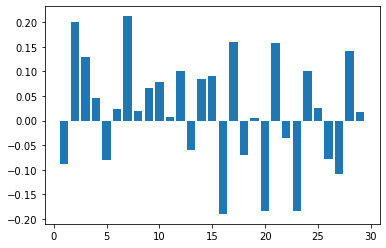

In [331]:
# autocorr
plt.bar(np.arange(1,30), [sleep['rem'].autocorr(i) for i in range(1, 30)])


<BarContainer object of 29 artists>

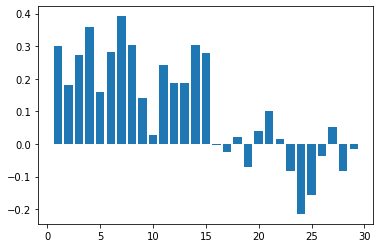

In [332]:
plt.bar(np.arange(1,30), [sleep['deep'].autocorr(i) for i in range(1, 30)])

<BarContainer object of 29 artists>

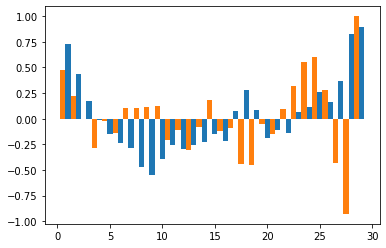

In [348]:
wd = 0.5
plt.bar(np.arange(1,30), [sleep[:'2020-04-23']['rmssd'].autocorr(i) for i in range(1, 30)], width=wd)
plt.bar(np.arange(1,30)-wd, [sleep['2020-04-24':'2020-05-24']['rmssd'].autocorr(i) for i in range(1, 30)], width=wd)

0.7316389200031881
0.47301972722583185


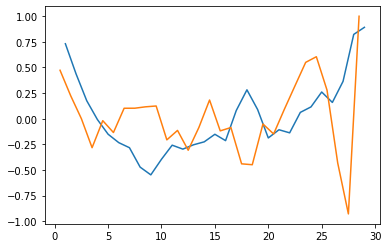

In [353]:
wd = 0.5
plt.plot(np.arange(1,30), [sleep[:'2020-04-23']['rmssd'].autocorr(i) for i in range(1, 30)])
plt.plot(np.arange(1,30)-wd, [sleep['2020-04-24':'2020-05-24']['rmssd'].autocorr(i) for i in range(1, 30)])
print(sleep[:'2020-04-23']['rmssd'].autocorr(1))
print(sleep['2020-04-24':'2020-05-24']['rmssd'].autocorr(1))

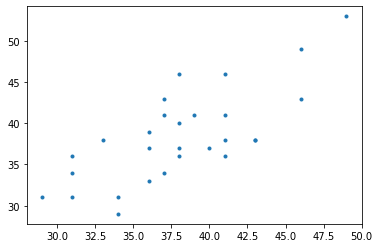

In [357]:
plt.plot(sleep['2020-03-22':'2020-04-22']['rmssd'], sleep['2020-03-23':'2020-04-23']['rmssd'], marker='.', linestyle='none')

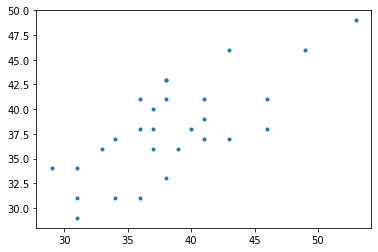

In [369]:
hrv_prf=np.array(sleep['2020-03-22':'2020-04-22']['rmssd'])
hrv_f = np.array(sleep['2020-03-23':'2020-04-23']['rmssd'])
plt.plot(hrv_f, hrv_prf, marker='.', linestyle='none')

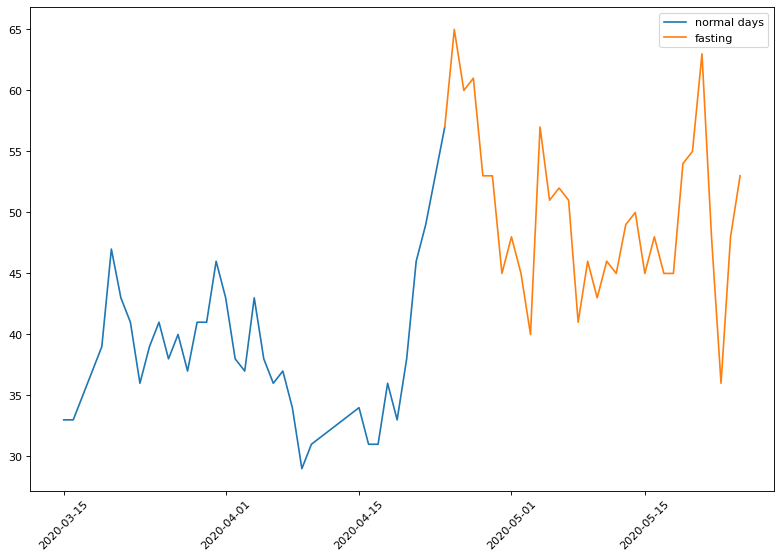

In [390]:
#plt.plot(hrv_prf-hrv_f)
resize()
metric='rmssd'
plt.plot(sleep[:'2020-04-24'][metric], label='normal days')
plt.plot(sleep['2020-04-24':'2020-05-25'][metric], label='fasting')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<BarContainer object of 60 artists>

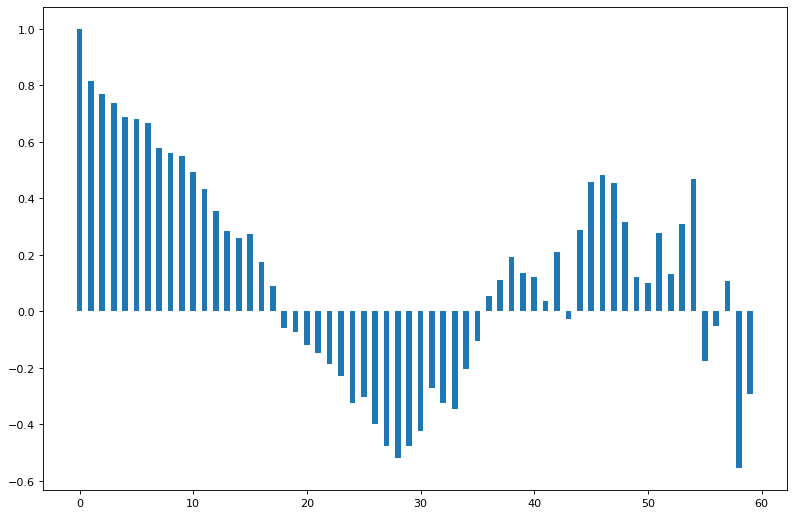

In [396]:
met='hr_average'
resize()
plt.bar(np.arange(0,60), [sleep[met].autocorr(i) for i in range(0, 60)], width=wd)

<BarContainer object of 30 artists>

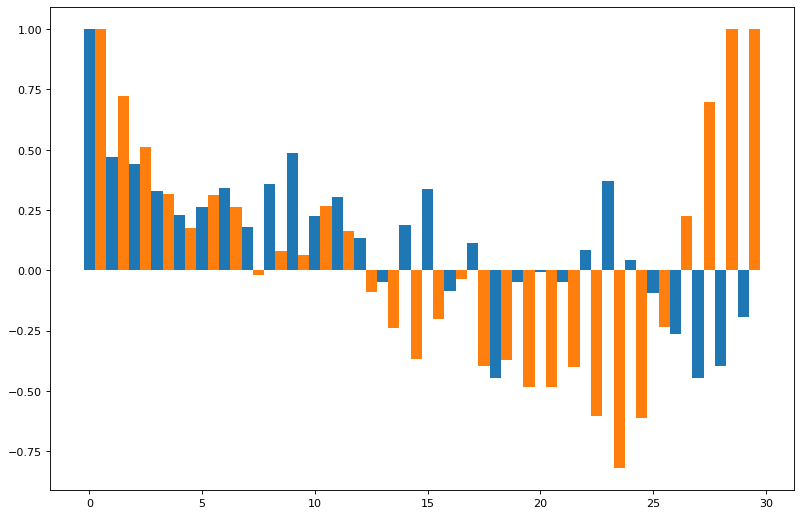

In [411]:
met='hr_average'
resize()
wd=0.5
plt.bar(np.arange(0,30), [sleep[:'2020-04-23'][met].autocorr(i) for i in range(0, 30)], width=wd)
plt.bar(np.arange(0,30)+wd, [sleep['2020-04-24':'2020-05-24'][met].autocorr(i) for i in range(0, 30)], width=wd)

<BarContainer object of 30 artists>

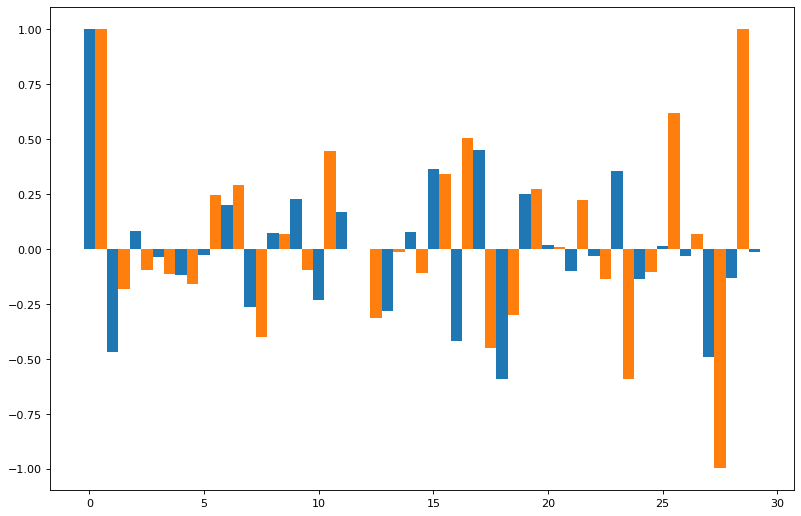

In [432]:
met='hr_average'
resize()
wd=0.5
plt.bar(np.arange(0,30), [sleep[:'2020-04-24'][met].diff().autocorr(i) for i in range(0, 30)], width=wd)
plt.bar(np.arange(0,30)+wd, [sleep['2020-04-24':'2020-05-24'][met].diff().autocorr(i) for i in range(0, 30)], width=wd)
#plt.bar(np.arange(0,30), [sleep[met].diff().autocorr(i) for i in range(0, 30)], width=wd)

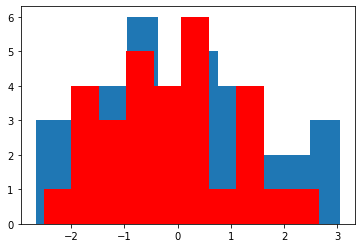

In [448]:
met='hr_average'
plt.hist(sleep[:'2020-04-24'][met].diff())
plt.hist(sleep['2020-04-24':'2020-05-24'][met].diff(), color='red')
plt.show()

0.6666666666666666
during fast: -0.3


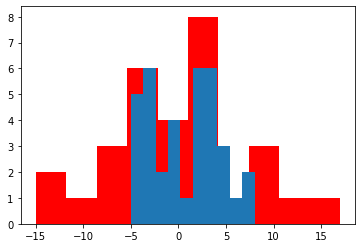

In [449]:
met='rmssd'
plt.hist(sleep['2020-04-24':'2020-05-24'][met].diff(), color='red')
plt.hist(sleep[:'2020-04-24'][met].diff())
print(sleep[:'2020-04-24'][met].diff().mean())
print("during fast: {}".format(sleep['2020-04-24':'2020-05-24'][met].diff().mean()))
plt.show()

0.029166666666666587
during fast: -0.1400000000000001


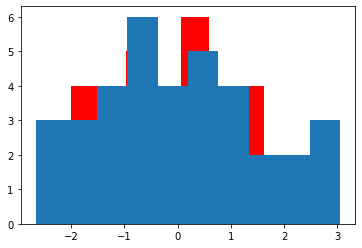

In [446]:
met='hr_average'
plt.hist(sleep['2020-04-24':'2020-05-24'][met].diff(), color='red')
plt.hist(sleep[:'2020-04-24'][met].diff())
print(sleep[:'2020-04-24'][met].diff().mean())
print("during fast: {}".format(sleep['2020-04-24':'2020-05-24'][met].diff().mean()))
plt.show()

In [408]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total', 'after fast'],
      dtype='object')

# Glucose

In [522]:
gl_fasted = np.array(glucose['2020-04-24':'2020-05-24'][g_lbl].dropna())
gl_prefasted = np.array(glucose[:'2020-04-25'][g_lbl].dropna())

In [533]:
def simple_diff(a,b):
    return np.mean(a)-np.mean(b)

In [534]:
fmean, pmean, fstd, pstd= np.mean(gl_fasted), np.mean(gl_prefasted), np.std(gl_fasted), np.std(gl_prefasted)
mean_diff = (pmean - fmean)
print("""
By how much mean glucose dropped during fast \t{:.2%}:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s

Standard deviations:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s
""".format(mean_diff, fmean, pmean, fstd, pstd)
)
nf, npref= len(gl_fasted), len(gl_prefasted)
print("Lenghts: {}, {}".format(nf, npref))

mean_diff_replicates = permute_and_draw_replicates(gl_fasted, gl_prefasted, get_means_diff, size=100000)



By how much mean glucose dropped during fast 	25.82%:
- Fast  :	5.0 s
- Before:	5.3 s

Standard deviations:
- Fast  :	1.1 s
- Before:	1.0 s

Lenghts: 2743, 2622


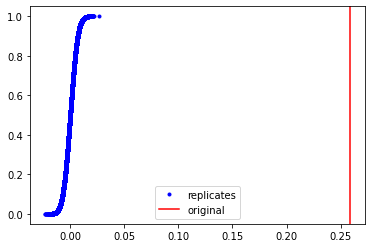

In [535]:
x, y = get_empirical_cdf(mean_diff_replicates)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=mean_diff, color='red', label='original')
plt.legend()

In [536]:
ps = np.percentile(mean_diff_replicates, [2.5, 97.5])
p_val = np.sum(mean_diff_replicates > mean_diff) / len(mean_diff_replicates)
print("""
Confidence Interval:
{:.4%}\t-\t{:.4%}
original value: {:.4%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], mean_diff, p_val, p_val))


Confidence Interval:
-1.0749%	-	1.0624%
original value: 25.8246%

P-value: 0.0 (0%)



In [569]:
win=70
avf = np.array(glucose['2020-04-24':'2020-05-24'][g_lbl].dropna().rolling(win).mean())
avpref = np.array(glucose[:'2020-04-25'][g_lbl].dropna().rolling(win).mean())


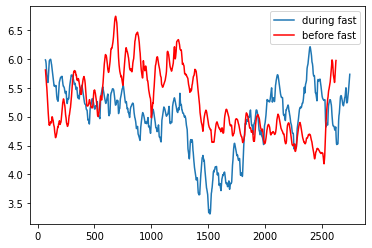

In [570]:
plt.plot(avf, label='during fast')
plt.plot(avpref, color='red', label='before fast')
plt.legend()

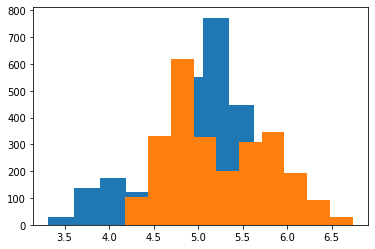

In [576]:
plt.hist(avf)
plt.hist(avpref, label='not fasting')
plt.show()

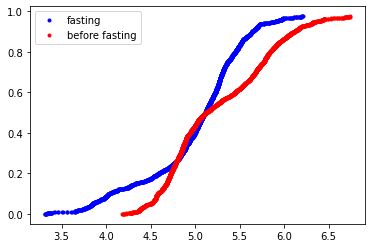

In [579]:
x, y = get_empirical_cdf(avf)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
plt.legend()
x, y = get_empirical_cdf(avpref)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fasting')
plt.legend()

(array([737394., 737425., 737456., 737485., 737516., 737546., 737577.]),
 <a list of 7 Text major ticklabel objects>)

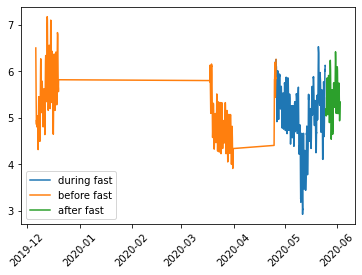

In [557]:
plt.box(glucose['2020-04-24':'2020-05-24'][g_lbl].dropna().rolling(win).mean())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 1 Axes>

# sheets

In [580]:
tracking = pd.read_csv('data-fasting/trck.csv')

In [581]:
tracking

,Unnamed: 0,WEIGHT (kg),BREAK FAST TIME,BREAK WATER-FAST TIME,LATEST MEAL TIME,WORK,SLEEP SUBJECTIVE,PRODUCTIVITY (SUBJECTIVE),energy level subjective,TAGS
0,3/15/2020,68.9,9:30,9:30,19:30,none,6,6,6,NaN
1,3/16/2020,68.9,10:10,10:10,19:33,wfh,6,8,8,NaN
2,3/17/2020,69.4,10:45,10:45,20:00,wfh,6,8,8,"CGM,cgmon"
3,3/18/2020,69.5,10:40,10:40,18:40,wfh,6,6,6,CGM
4,3/19/2020,70.0,18:00,18:00,19:30,wfh,6,8,6,"fast,CGM"
...,...,...,...,...,...,...,...,...,...,...
73,5/27/2020,68.7,10:13,9:15,20:20,wfh,6,8,8,CGM
74,5/28/2020,69.4,19:55,19:55,21:25,wfh,6,6,6,"CGM,fast"
75,5/29/2020,68.8,10:00,8:40,21:00,wfh,6,8,8,CGM
76,5/30/2020,69.0,11:30,11:30,19:30,none,6,9,8,CGM


In [584]:
dtime_lbl='dtime'
trac_lbl = 'Unnamed: 0'
weig='WEIGHT (kg)'
tracking['dtime']=pd.to_datetime(tracking[trac_lbl], format='%m/%d/%Y')
tracking.set_index(dtime_lbl, inplace=True)

In [ ]:
tracking['energy level subjective']

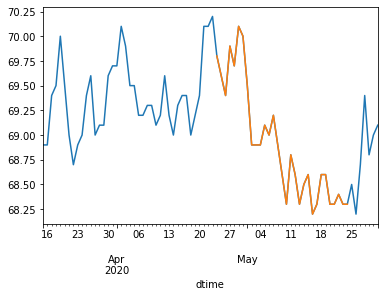

In [587]:
tracking[weig].plot()
tracking['2020-04-24':'2020-05-24'][weig].plot()

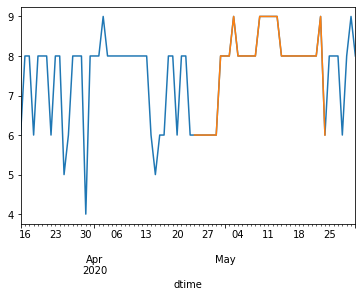

In [590]:
tracking['PRODUCTIVITY (SUBJECTIVE)'].plot()
tracking['2020-04-24':'2020-05-24']['PRODUCTIVITY (SUBJECTIVE)'].plot()

In [592]:
weif = np.array(tracking['2020-04-24':'2020-05-24'][weig])
weipref = np.array(tracking[:'2020-04-25'][weig])


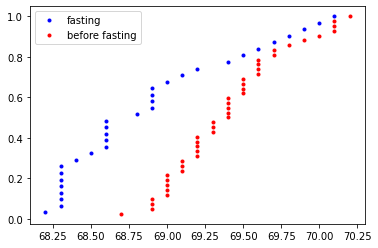

In [593]:
x, y = get_empirical_cdf(weif)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasting')
plt.legend()
x, y = get_empirical_cdf(weipref)
plt.plot(x, y, color='red', marker='.', linestyle='none', label='before fasting')
plt.legend()


Mean diff 	0.72%:
- Fast  :	68.9 s
- Before:	69.4 s

Standard deviations:
- Fast  :	0.6 s
- Before:	0.4 s

Lenghts: 29, 39


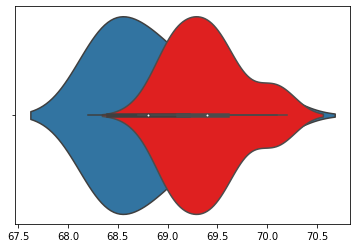

In [615]:
def mean_modiff(d1,d2):
    md1=np.mean(d1)
    if md1==0:
        return
    return (md1-np.mean(d2))/md1

test_lbl=weig
fasted = np.array(tracking['2020-04-24':'2020-05-23'][test_lbl][1:])
prefasted = np.array(tracking['2020-03-15':'2020-04-23'][test_lbl][1:])
end = np.array(tracking['2020-05-25':][test_lbl])
sns.violinplot(fasted)
sns.violinplot(prefasted,color='red')

fmean, pmean, fstd, pstd= np.mean(fasted), np.mean(prefasted), np.std(fasted), np.std(prefasted)
mean_diff = (pmean - fmean)/pmean
print("""
Mean diff \t{:.2%}:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s

Standard deviations:
- Fast  :\t{:,.1f} s
- Before:\t{:,.1f} s
""".format(mean_diff, fmean, pmean, fstd, pstd)
)
nf, npref= len(fasted), len(prefasted)
print("Lenghts: {}, {}".format(nf, npref))

fasted_n = (fasted -fmean)/nf
prefasted_n = (prefasted -pmean)/npref

mean_diff_replicates = permute_and_draw_replicates(prefasted, fasted, get_means_diff, size=10000)



Confidence Interval:
-0.3691%	-	0.3610%
original value: 0.7244%

P-value: 0.0 (0%)



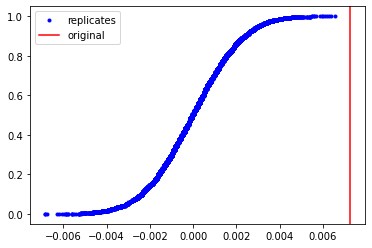

In [616]:
x, y = get_empirical_cdf(mean_diff_replicates)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=mean_diff, color='red', label='original')
plt.legend()
ps = np.percentile(mean_diff_replicates, [2.5, 97.5])
p_val = np.sum(mean_diff_replicates > mean_diff) / len(mean_diff_replicates)
print("""
Confidence Interval:
{:.4%}\t-\t{:.4%}
original value: {:.4%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], mean_diff, p_val, p_val))